# Analyse de données boursières avec Python
Ce projet analyse les données historiques de l'action Apple (AAPL) de 2020 à 2023.

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## Récupération des données
Nous utilisons la bibliothèque `yfinance` pour télécharger les données boursières.

In [3]:
# Récupération des données boursières pour Apple (AAPL)
data = yf.download("AAPL", start="2020-01-01", end="2023-12-31")
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716057,72.776583,71.466797,71.721004,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200


## Nettoyage des données
Suppression des valeurs manquantes pour garantir la qualité de l'analyse.

In [4]:
# Nettoyage des données
data = data.dropna()

## Analyse
Calcul des moyennes mobiles sur 50 et 200 jours pour identifier les tendances.

In [5]:
# Analyse : Calcul des moyennes mobiles
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

## Visualisation des prix et moyennes mobiles
Graphique montrant l'évolution des prix et des moyennes mobiles.

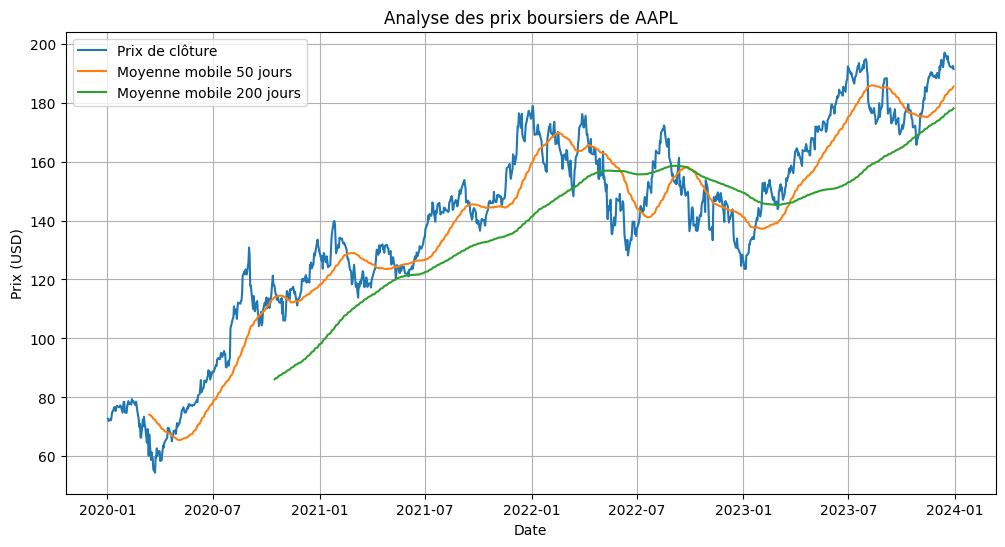

In [6]:
# Visualisation 1 : Prix de clôture et moyennes mobiles
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Prix de clôture')
plt.plot(data['MA50'], label='Moyenne mobile 50 jours')
plt.plot(data['MA200'], label='Moyenne mobile 200 jours')
plt.title('Analyse des prix boursiers de AAPL')
plt.xlabel('Date')
plt.ylabel('Prix (USD)')
plt.legend()
plt.grid(True)
plt.savefig('stock_analysis.png')

## Calcul des rendements journaliers
Analyse de la variation quotidienne des prix.

In [7]:
# Calcul des rendements journaliers
data['Daily_Return'] = data['Close'].pct_change()

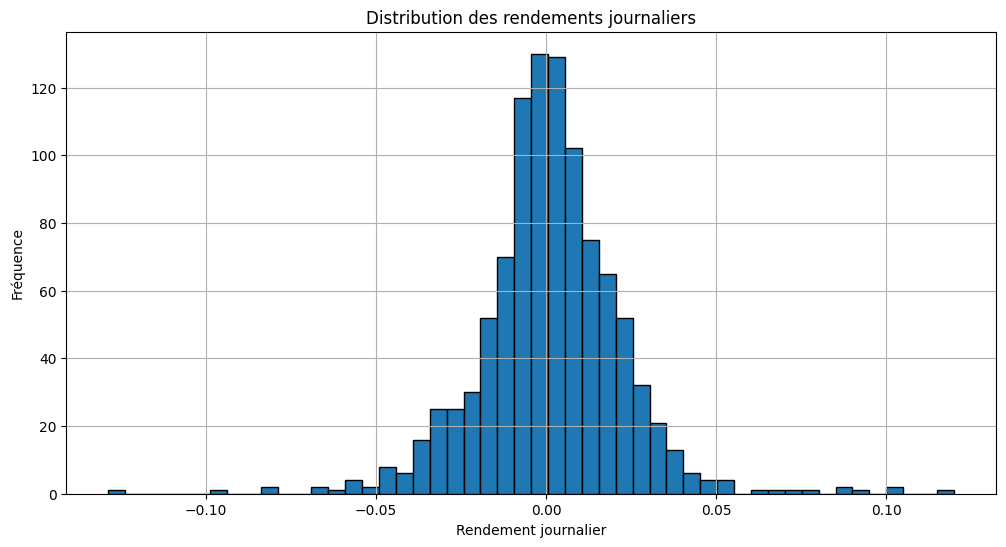

In [8]:
# Visualisation 2 : Histogramme des rendements journaliers
plt.figure(figsize=(12, 6))
plt.hist(data['Daily_Return'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution des rendements journaliers')
plt.xlabel('Rendement journalier')
plt.ylabel('Fréquence')
plt.grid(True)
plt.savefig('daily_returns.png')

## Conclusion
Ce projet montre une analyse de base des données boursières. Les moyennes mobiles indiquent des tendances, et l'histogramme révèle la volatilité des rendements.